In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

movies_df = pd.read_csv("data/movies.csv")
links_df = pd.read_csv("data/links.csv")
ratings_df = pd.read_csv("data/ratings.csv")
tags_df = pd.read_csv("data/tags.csv")


links_df.set_index('movieId')

movie_link_df = movies_df.set_index('movieId').join(links_df.set_index('movieId'))

movie_rating_df = movies_df.set_index('movieId').join(ratings_df.set_index('movieId'))

movie_tag_df = movies_df.set_index('movieId').join(tags_df.set_index('movieId'))


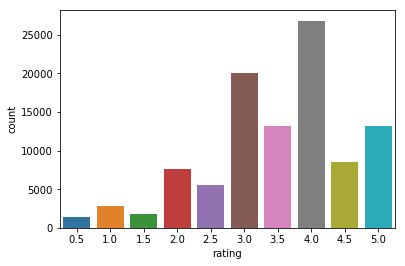

In [2]:
# Show chart

sns.countplot(x='rating', data=ratings_df)

Movies have high rating from 3 to 5.

In [3]:
movie_rating_splited = movie_rating_df.assign(genres=movie_rating_df.genres.str.split('|', expand=True))

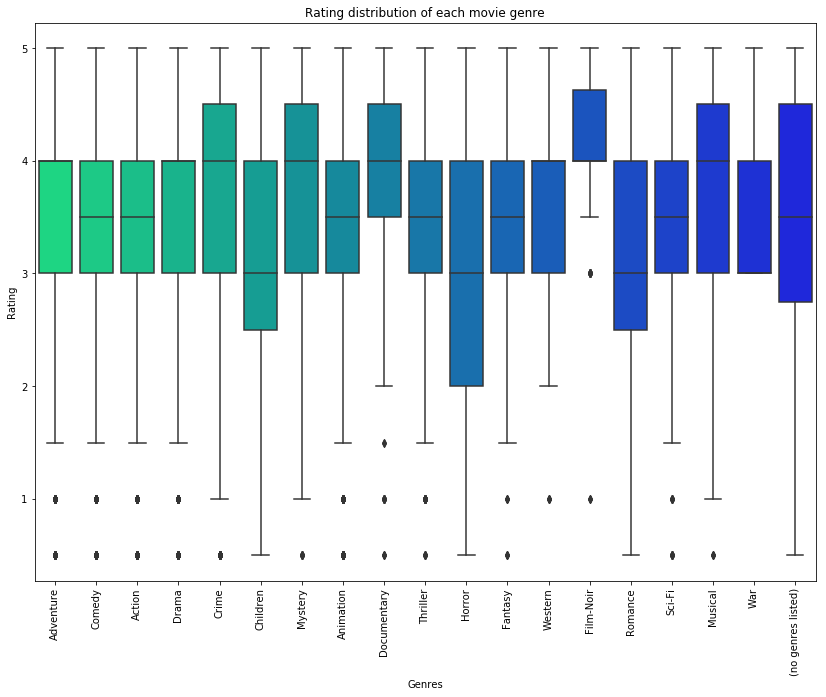

In [4]:
plt.figure(figsize = (14,10))
sns.boxplot(x = 'genres', y = 'rating', data = movie_rating_splited, palette="winter_r")
plt.xticks(rotation=90)
plt.title("Rating distribution of each movie genre")
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

Almost movie genre have rating from 3 to 4.5

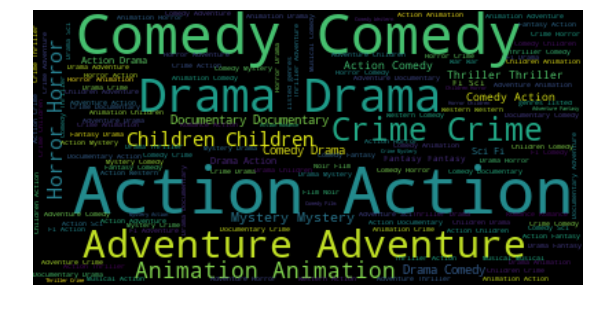

In [5]:
from wordcloud import WordCloud, STOPWORDS
# Generate a word cloud image
wordcloud = WordCloud( margin=0, stopwords=STOPWORDS).generate(movie_rating_splited.genres.to_string())
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.margins(x=0, y=0)
# plt.show()
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Many movie genres are action, Comedy, Drama, Adventure.

In [6]:
# sp = movie_rating_df.assign(genres=movie_rating_df.genres.str.split('|', expand=True))

sp = movie_rating_splited.drop('timestamp', axis=1)
sp = movie_rating_splited.drop('title', axis=1)
gr = sp.groupby(['genres', 'rating']).count().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

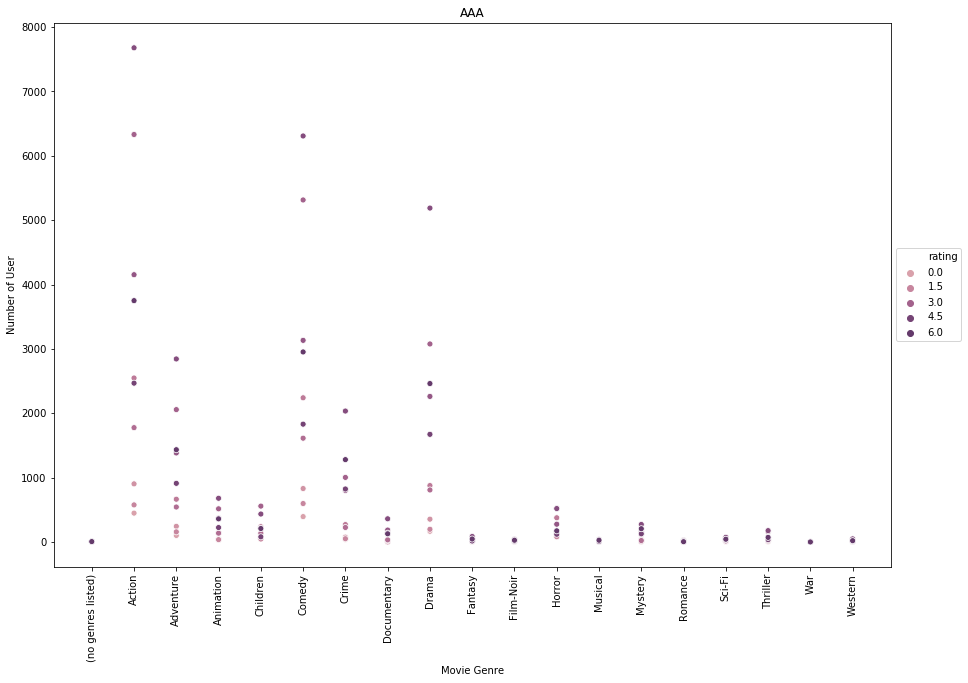

In [7]:
f,ax = plt.subplots(figsize=(15,10))
cmap = sns.cubehelix_palette(dark=.3, light=.7, as_cmap=True)
sns.scatterplot(x='genres', y='userId', hue='rating',palette=cmap, data=gr)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("AAA")
plt.xlabel('Movie Genre')
plt.ylabel('Number of User')
plt.xticks(rotation=90)

Action, Comedy, Drama movie genres have high rating amount.

In [8]:
# movie_rating_extract_year = movie_rating_splited.assign(title=movie_rating_splited.title.str.split('(', expand=True))
movie_rating = movie_rating_splited.drop('timestamp', axis=1)
movie_rating['year'] = movie_rating.title.str.extract('\((\d{4})\)$')
movie_rating.year.fillna(0, inplace=True)
# 
movie_rating.year = movie_rating.year.astype('int64', errors='ignore')

movie_rating = movie_rating.sort_values('year')
movie_rating = movie_rating.groupby(['year', 'genres']).sum().reset_index()
recently_data = movie_rating[movie_rating.year > 2005]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

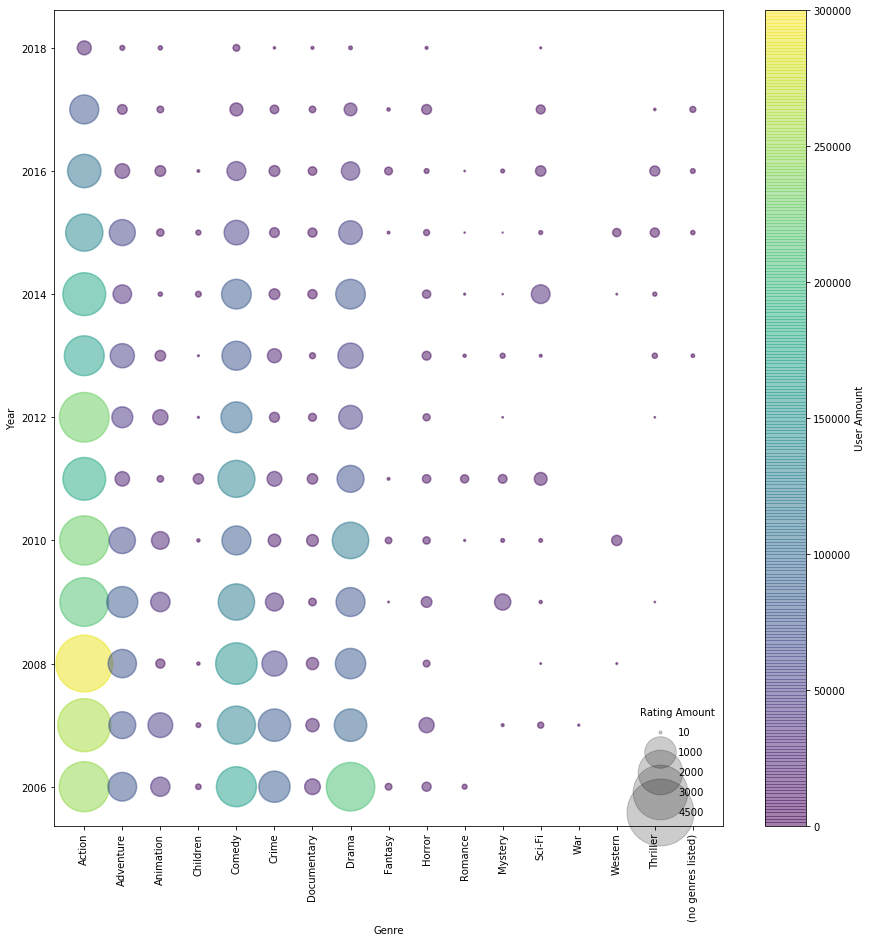

In [9]:
genres = recently_data['genres']
year = recently_data['year']
ratingAmount = recently_data['rating']
userAmount = recently_data['userId']

f,ax = plt.subplots(figsize=(15,15))
plt.scatter(genres, year, label=None, c=userAmount, s=ratingAmount, linewidth=1.5, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.colorbar(label='User Amount')
plt.clim(0, 300000)

for rating in [10, 1000, 2000, 3000, 4500]:
    plt.scatter([], [], c='k', alpha=0.2, s=rating, label=str(rating))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Rating Amount')
plt.xticks(rotation=90)